In this we will check the saliency map for the given image using ResNet50 model.

### Import Tensorflow and Load ResNet50 Model with weights pre-trained on Imagenet.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 39s 0us/step


### Model summary

In [2]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

### Load given Image `1.jpg` 

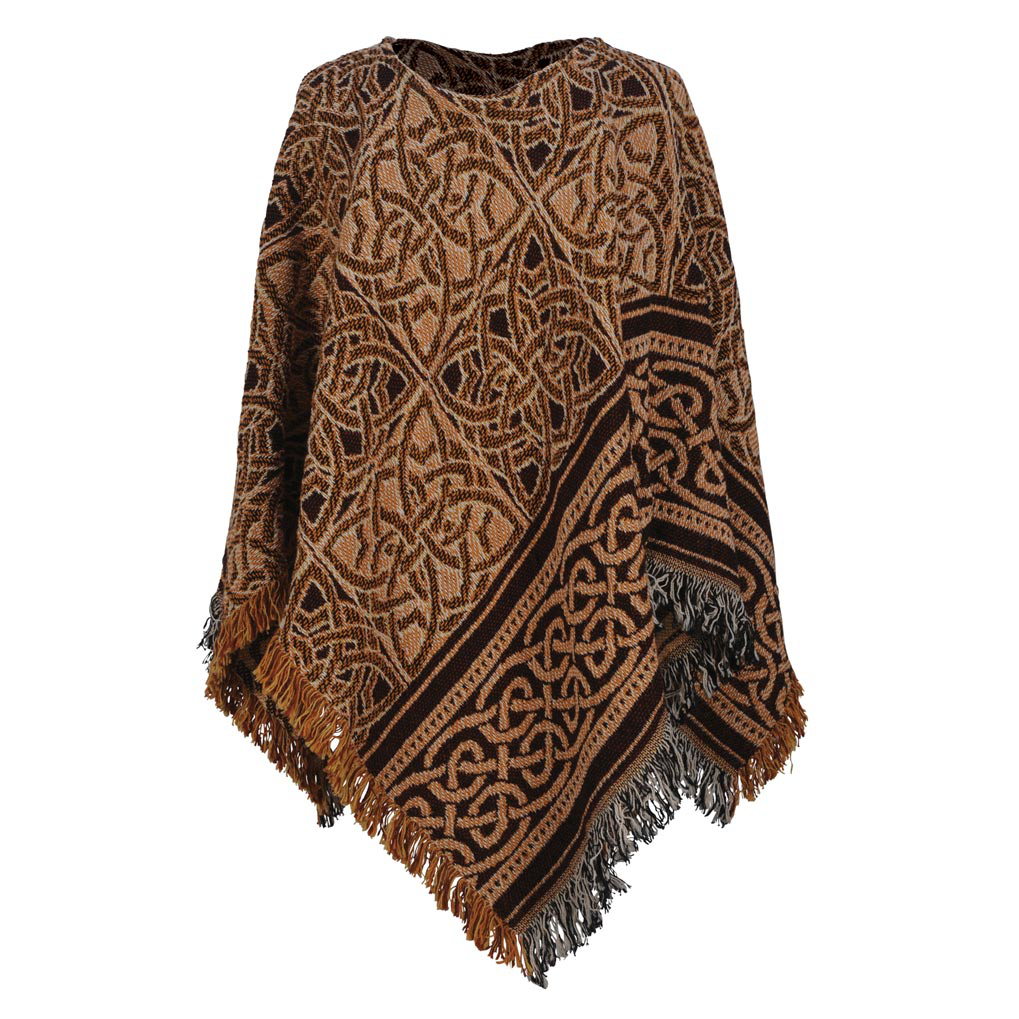

In [4]:
img = tf.keras.preprocessing.image.load_img('1.jpg')
img

### Prepare the image for prediction Prediction and get the predictions using resnet50

In [5]:
import numpy as np

In [6]:
#Prepare image prediction
img_array = tf.keras.preprocessing.image.img_to_array(img.resize((224, 224)))

#Create a batch
img_array = np.expand_dims(img_array, axis=0)

#Pre-process the image
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

#Get the prediction
prediction = model.predict(img_array)

#Get the index with highest probability
pred_index = np.argmax(prediction[0])

#Decode prediction
prediction = tf.keras.applications.vgg19.decode_predictions(prediction)

pred_index, prediction

40960/35363 [==================================] - 0s 5us/step


(735,
 [[('n03980874', 'poncho', 0.4957133),
   ('n04325704', 'stole', 0.28053194),
   ('n03404251', 'fur_coat', 0.07734474),
   ('n04599235', 'wool', 0.060213055),
   ('n04136333', 'sarong', 0.047344234)]])

### Building Saliency Maps

### Access model input and output and assign variable names `input_img` and `model_output` respectively.

In [7]:
input_img = model.input
model_output = model.output

In [9]:
print ("Model Input:", input_img)
print("Model output:", model_output)

Model Input: Tensor("input_1:0", shape=(?, 224, 224, 3), dtype=float32)
Model output: Tensor("fc1000/Softmax:0", shape=(?, 1000), dtype=float32)


### Take mean of the 735th filter in the model output as Loss

In [10]:
loss = tf.keras.backend.mean(model_output[:,735])

In [11]:
print ("Loss:", loss)

Loss: Tensor("Mean:0", shape=(), dtype=float32)


### Calculate Gradients

In [14]:
#Gradient of loss w.r.t input image
grads = tf.keras.backend.gradients(loss, input_img)[0]

#Gradient normalization
K = tf.keras.backend
grads /= K.sqrt(K.mean(K.square(grads))) + K.epsilon()

#Define function to run Graph
iterate = K.function([input_img], [loss, grads])

In [15]:
loss_value, grads_value = iterate([img_array])

### Plot Gradients as Saliency Map

In [16]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


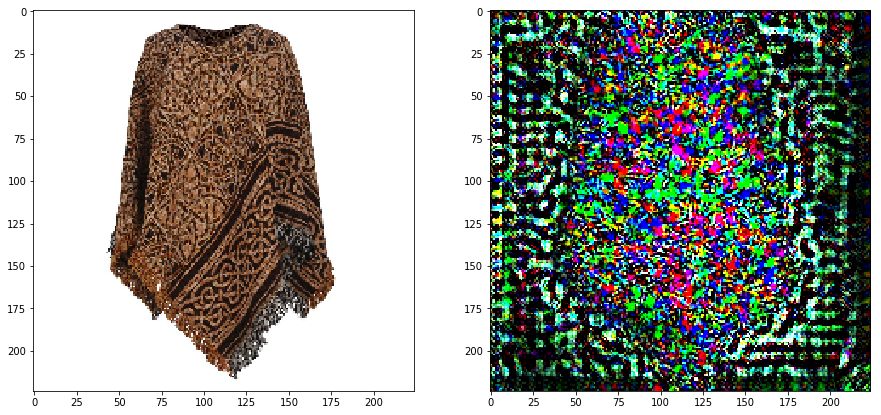

In [17]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img.resize((224,224)))
plt.subplot(1,2,2)
plt.imshow(grads_value[0], cmap='jet')
plt.show()